# **Import Libraries**

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import confusion_matrix

# **Preprocessing** 

### Cleaning the Data

In [6]:
data = pd.read_csv("Pokemon.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [7]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
# add your code here for data cleaning of the adventure data set INCOME
data.duplicated().any()

False

In [9]:
data.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [10]:
data['Type 2'] = data['Type 2'].fillna('None')

In [11]:
original_data = data.copy()

In [12]:
# Step 2: Encode the 'Type 1' column
type1_mapping = {type_: idx for idx, type_ in enumerate(data['Type 1'].unique())}
data['Type 1 Encoded'] = data['Type 1'].map(type1_mapping)

# Step 3: Encode the 'Type 2' column
type2_mapping = {type_: idx for idx, type_ in enumerate(data['Type 2'].unique())}
data['Type 2 Encoded'] = data['Type 2'].map(type2_mapping)

In [13]:
# Step 4: Drop the original 'Type 1' and 'Type 2' columns and replace them with encoded columns
data.drop(['Type 1', 'Type 2'], axis=1, inplace=True)
data.rename(columns={'Type 1 Encoded': 'Type 1', 'Type 2 Encoded': 'Type 2'}, inplace=True)

In [14]:
# Step 4: Convert 'Legendary' to 1s and 0s
data['Legendary'] = data['Legendary'].astype(int)

# Drop the 'Name' and '#' columns
data.drop(['#', 'Name'], axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   Legendary   800 non-null    int32
 9   Type 1      800 non-null    int64
 10  Type 2      800 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 65.8 KB


In [16]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1,Type 2
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,6.306250,3.76250
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,4.876955,4.30049
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,0.000000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,2.000000,1.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,4.000000,1.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,10.000000,6.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,17.000000,18.00000


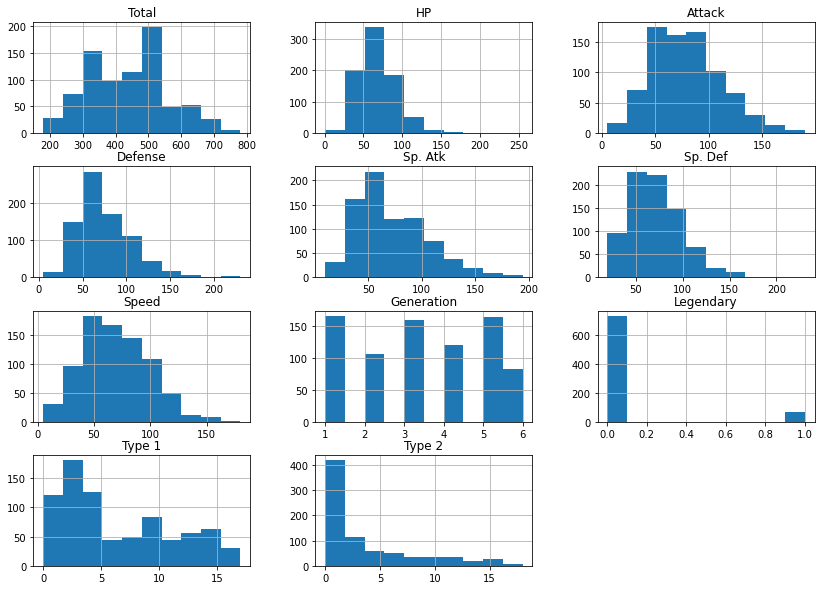

In [17]:
# Add visualizations here that you made to present insights in the adventure data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.
# Histograms for distribution
data.hist(figsize=(14, 10))
plt.show()

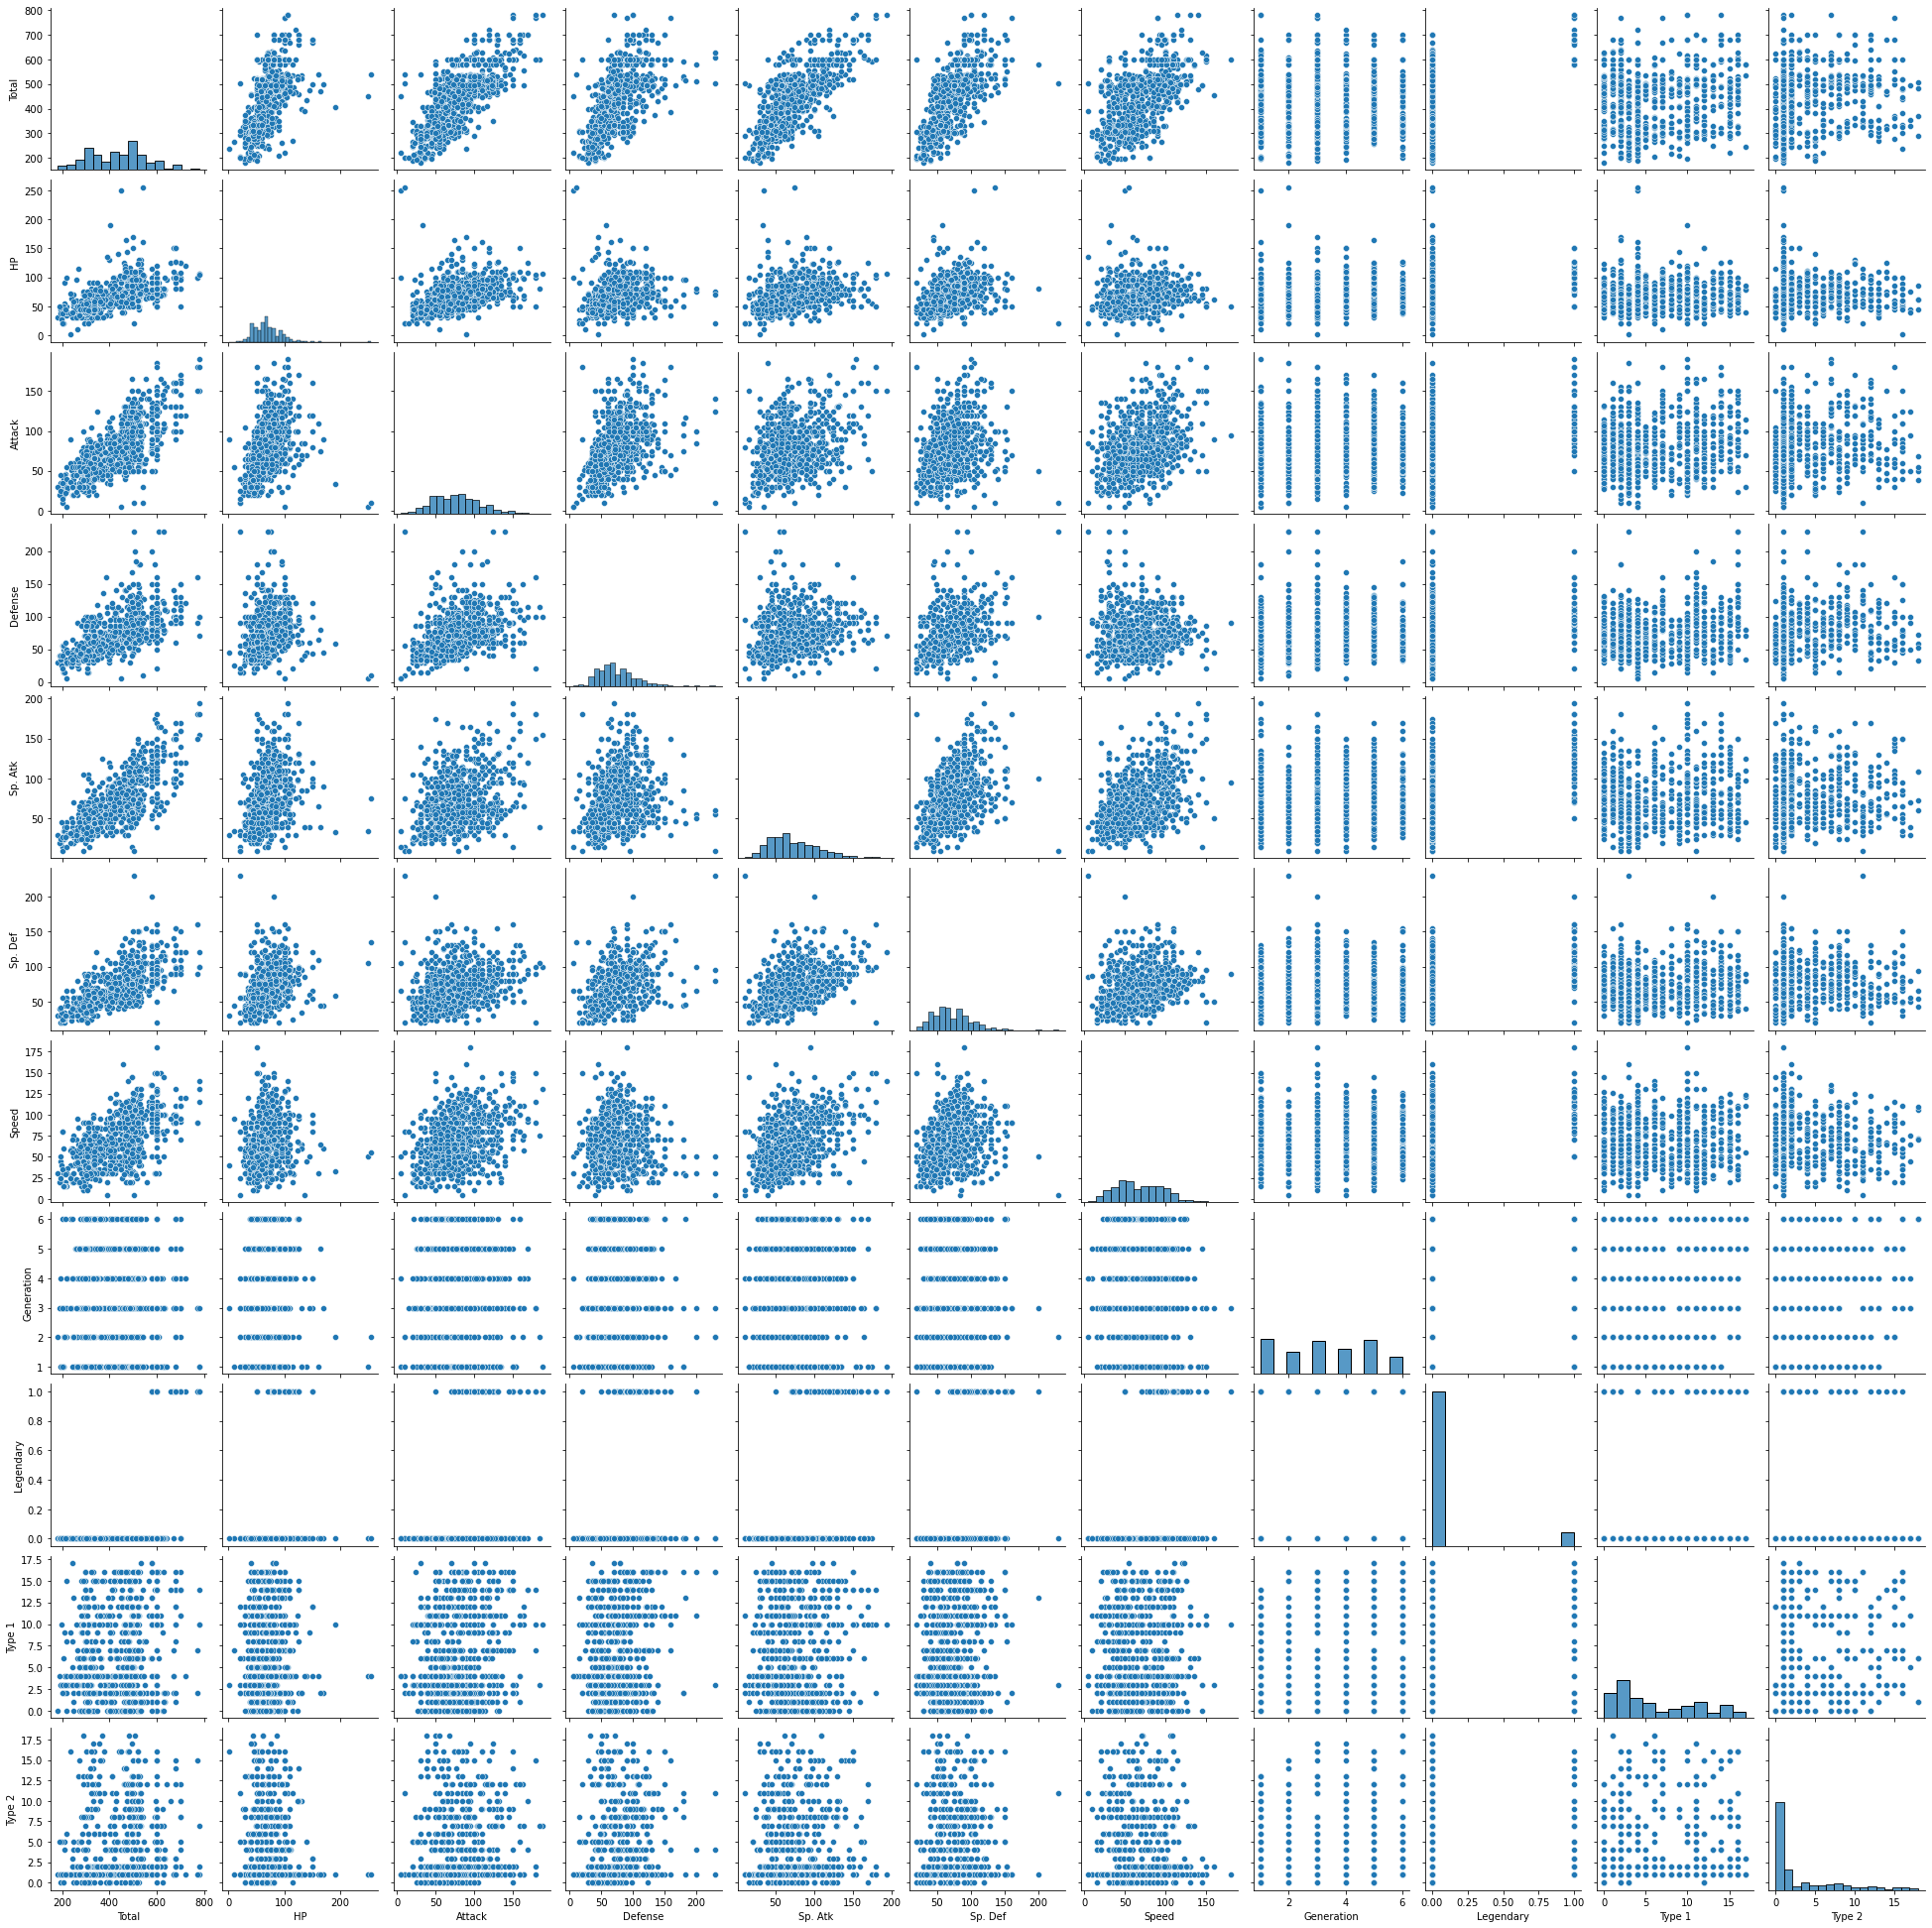

In [18]:
# Pairplot to see pairwise relationships
sns.pairplot(data)
plt.show()

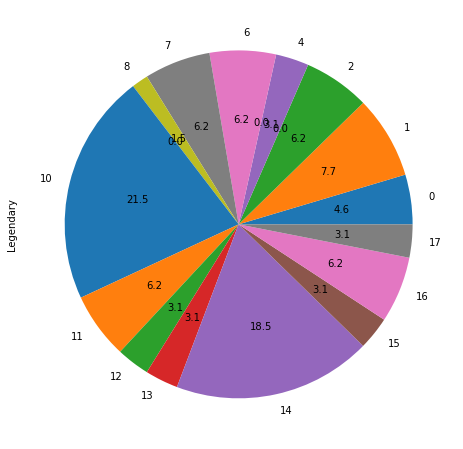

In [56]:
generation_legendary_type=data.groupby(by='Type 1')['Legendary'].sum()
generation_legendary_type.plot.pie(autopct='%1.1f',figsize=(8,8))
plt.show()

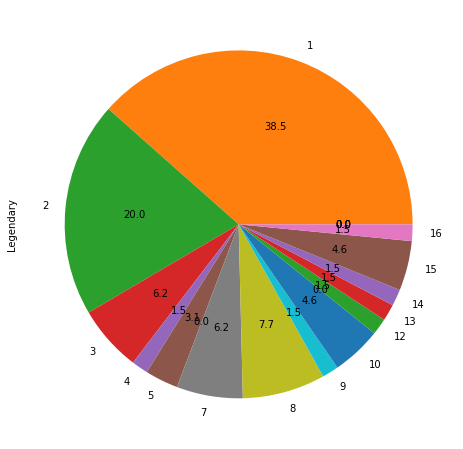

In [57]:
generation_legendary_type=data.groupby(by='Type 2')['Legendary'].sum()
generation_legendary_type.plot.pie(autopct='%1.1f',figsize=(8,8))
plt.show()

<AxesSubplot:>

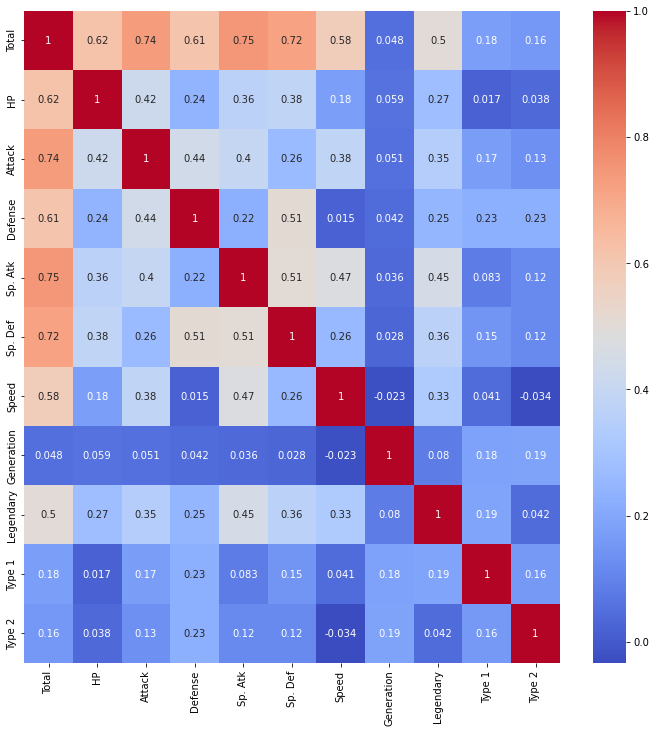

In [19]:
plt.figure(figsize = (12, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data.columns,
            yticklabels=data.columns)

In [20]:
data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1,Type 2
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758,0.175177,0.155009
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,0.017041,0.037647
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,0.169334,0.132419
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,0.228763,0.228598
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,0.082983,0.117869
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,0.145101,0.119558
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,0.041169,-0.033602
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,0.180687,0.185958
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,0.188765,0.041982
Type 1,0.175177,0.017041,0.169334,0.228763,0.082983,0.145101,0.041169,0.180687,0.188765,1.000000,0.159043


In [21]:
data.head(15)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1,Type 2
0,318,45,49,49,65,65,45,1,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0
4,309,39,52,43,60,50,65,1,0,1,1
5,405,58,64,58,80,65,80,1,0,1,1
6,534,78,84,78,109,85,100,1,0,1,2
7,634,78,130,111,130,85,100,1,0,1,3
8,634,78,104,78,159,115,100,1,0,1,2
9,314,44,48,65,50,64,43,1,0,2,1


# **Ensemble learning**

In [22]:
selection = VarianceThreshold(threshold=(0.1))    
X = data.drop(columns=['Type 1', 'Type 2', 'Total', 'Generation', 'Legendary'])
y = data['Legendary']
X.shape

(800, 6)

In [23]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [24]:
# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0.1)
X_reduced = selector.fit_transform(X)

In [25]:
# Encode 'Legendary' as the target variable
y = data['Legendary'].astype('int')  # Ensure the target variable is in the correct format

# Check class distribution
print(y.value_counts())

# Split data into training and testing sets
# Use stratified split if class distribution allows, otherwise use normal split
try:
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, stratify=y, test_size=0.2, random_state=42)
except ValueError as e:
    print(f"Warning: {e}. Proceeding with a non-stratified split.")
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

0    735
1     65
Name: Legendary, dtype: int64


In [26]:
X_train.shape, X_test.shape

((640, 6), (160, 6))

## Logistic regression

In [40]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_LRpred = model.predict(X_test)
print('Accuracy for LogisticRegression is {:.2%}'.format(metrics.accuracy_score(y_LRpred,y_test)))


Accuracy for LogisticRegression is 91.88%


## KNN

In [27]:
knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.96875
- MCC: 0.780783451431058
- F1 score: 0.9678726820677509
----------------------------------
Model performance for Test set
- Accuracy: 0.925
- MCC: 0.42381920430616
- F1 score: 0.9186851738865162


## Support vector machine (Radial basis function kernel)

In [28]:
svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.9921875
- MCC: 0.9467505463384766
- F1 score: 0.9920814123397074
----------------------------------
Model performance for Test set
- Accuracy: 0.91875
- MCC: 0.2454212454212454
- F1 score: 0.8984493302271405


## Decision tree

In [29]:
dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.9703125
- MCC: 0.8105190669338227
- F1 score: 0.9709300253057451
----------------------------------
Model performance for Test set
- Accuracy: 0.91875
- MCC: 0.43641957747665805
- F1 score: 0.9172627118644069


## Random forest

In [30]:
rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.990625
- MCC: 0.9358051636439783
- F1 score: 0.9904533898305086
----------------------------------
Model performance for Test set
- Accuracy: 0.91875
- MCC: 0.30252392330819955
- F1 score: 0.9047276621787026


## Neural network

In [31]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.953125
- MCC: 0.6700732846205569
- F1 score: 0.9518090231016265
----------------------------------
Model performance for Test set
- Accuracy: 0.9125
- MCC: 0.2719095883468332
- F1 score: 0.90025


# **Build Stacked model**

In [32]:
estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.9890625
- MCC: 0.9252426537622794
- F1 score: 0.9889139772755902
----------------------------------
Model performance for Test set
- Accuracy: 0.91875
- MCC: 0.30252392330819955
- F1 score: 0.9047276621787026


# **Results**

In [33]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1}

In [34]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.968750,0.780783,0.967873
svm_rbf,0.992188,0.946751,0.992081
dt,0.970313,0.810519,0.970930
rf,0.990625,0.935805,0.990453
mlp,0.953125,0.670073,0.951809
stack,0.989062,0.925243,0.988914


## Comparison of the accuracy of each algorithm

                         CV mean       Std
Logistic Regression     0.926220  0.018590
KNN                     0.921184  0.040321
Decision Tree           0.908690  0.035014
Random Forest           0.923686  0.037213
Support vector machine  0.924962  0.026279


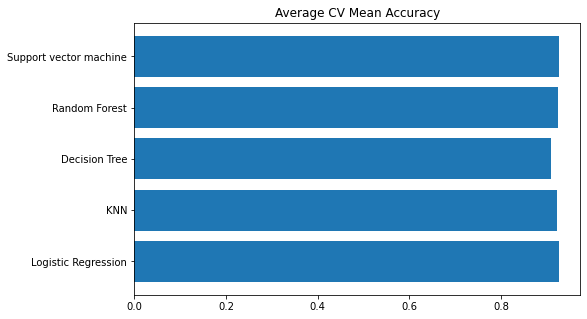

In [55]:
classifiers=['Logistic Regression','KNN','Decision Tree','Random Forest','Support vector machine']
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),svm.SVC(kernel='rbf')]
xyz = []  
std = []  
accuracy = []
for i in models:
    model = i
    kfolds = KFold(n_splits=3)
    cv_result = cross_val_score(model,X,y,cv=kfolds,scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV mean':xyz,'Std':std},index=classifiers)
print(new_models_dataframe2)
new_models_dataframe2['CV mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Adjust the KNN parameters

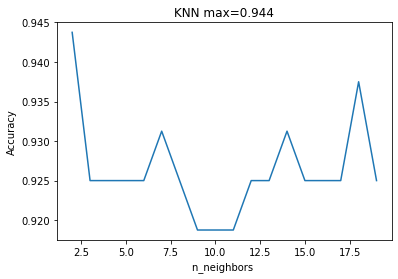

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
knn_scores = []
for k in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))

plt.plot(range(2, 20),knn_scores)
plt.title(f'KNN max=%.3f'%(max(knn_scores)))
plt.xlabel('n_neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [37]:
best_k = np.array(knn_scores).argmax() + 2 # k值变化的起始值为2
print(f'Best k = %d'%best_k)

Best k = 2
